In [3]:
#@title 1.2. INSTALL PACKAGE
!pip install tqdm

In [1]:
#@title 1.3. IMPORT LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#@title 1.4. RETRIEVE DATA
df_credit = pd.read_csv('/workspaces/functional-kan/phase_1/data/german_credit_data.csv')
df_credit['Risk'] = df_credit['Risk'].map({'good': 1, 'bad': 0})
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,0


In [21]:
#@title 2.1. FIRST LOOK AT DATA

print(df_credit.info())
print(df_credit.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


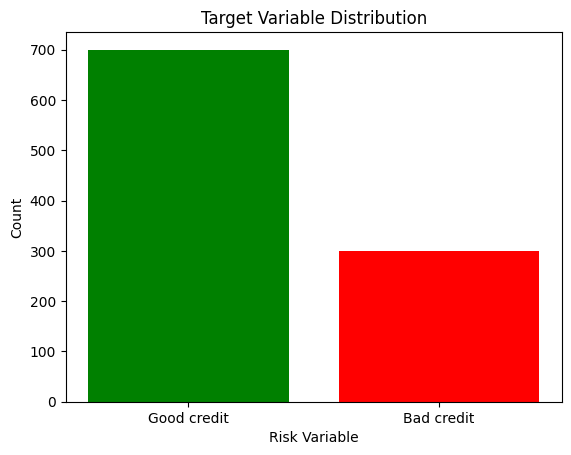

In [3]:
#@title 2.2. TARGET EXPLORATION

good_credit_count = df_credit[df_credit["Risk"] == 1]["Risk"].value_counts().values[0]
bad_credit_count = df_credit[df_credit["Risk"] == 0]["Risk"].value_counts().values[0]

# Create the bar chart
fig, ax = plt.subplots()

# Bar positions and heights
categories = ['Good credit', 'Bad credit']
counts = [good_credit_count, bad_credit_count]

# Plotting bars
ax.bar(categories, counts, color=['green', 'red'])

# Add labels and title
ax.set_xlabel('Risk Variable')
ax.set_ylabel('Count')
ax.set_title('Target Variable Distribution')

# Show plot
plt.show()

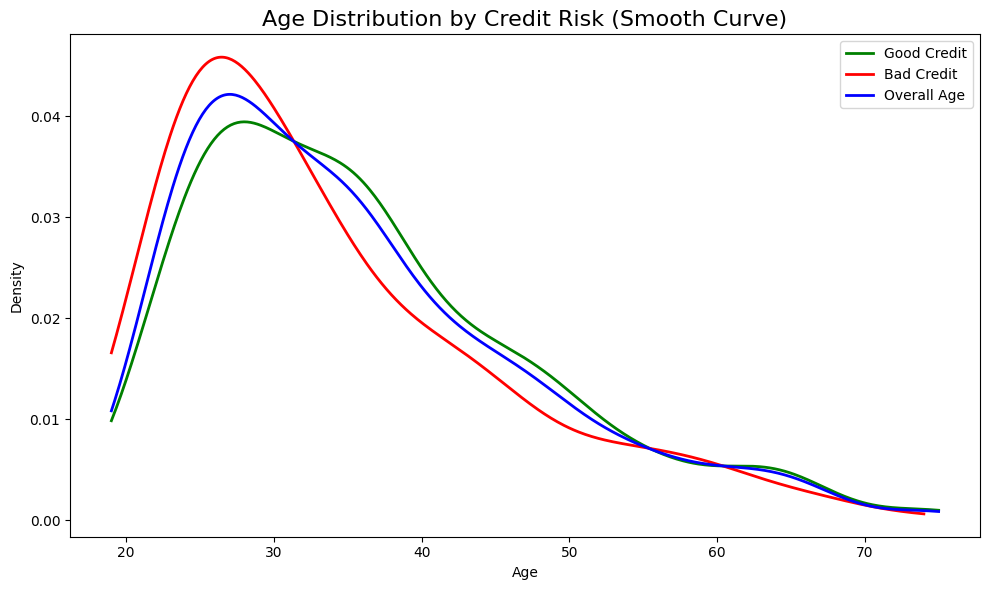

In [6]:
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Prepare the data
df_good = df_credit.loc[df_credit["Risk"] == 1]['Age'].values
df_bad = df_credit.loc[df_credit["Risk"] == 0]['Age'].values
df_age = df_credit['Age'].values

# Create the plot
plt.figure(figsize=(10, 6))

# KDE for Good Credit
kde_good = gaussian_kde(df_good)
x_good = np.linspace(min(df_good), max(df_good), 500)
plt.plot(x_good, kde_good(x_good), label="Good Credit", color='g', linewidth=2)

# KDE for Bad Credit
kde_bad = gaussian_kde(df_bad)
x_bad = np.linspace(min(df_bad), max(df_bad), 500)
plt.plot(x_bad, kde_bad(x_bad), label="Bad Credit", color='r', linewidth=2)

# KDE for Overall Age
kde_age = gaussian_kde(df_age)
x_age = np.linspace(min(df_age), max(df_age), 500)
plt.plot(x_age, kde_age(x_age), label="Overall Age", color='b', linewidth=2)

# Add title, legend, and labels
plt.title('Age Distribution by Credit Risk (Smooth Curve)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


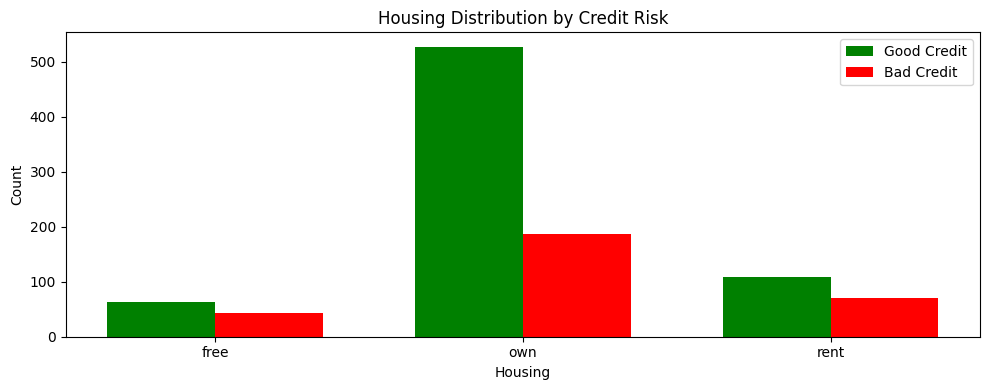

In [41]:
#@title 2.4. HOUSING DISTRIBUTION OVER TARGET

good_housing_counts = df_credit[df_credit["Risk"] == 1]["Housing"].value_counts()
bad_housing_counts = df_credit[df_credit["Risk"] == 0]["Housing"].value_counts()

# Extract unique housing categories for the x-axis
housing_categories = sorted(df_credit["Housing"].unique())

# Get the counts in the same order for 1 and 0 risks
good_counts = [good_housing_counts.get(cat, 0) for cat in housing_categories]
bad_counts = [bad_housing_counts.get(cat, 0) for cat in housing_categories]

# X-axis positions for grouped bars
x = np.arange(len(housing_categories))  # the label locations
width = 0.35  # width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 4))

# First plot - Good credit
rects1 = ax.bar(x - width/2, good_counts, width, label='Good Credit', color='g')

# Second plot - Bad credit
rects2 = ax.bar(x + width/2, bad_counts, width, label='Bad Credit', color='r')

# Add labels, title, and legend
ax.set_xlabel('Housing')
ax.set_ylabel('Count')
ax.set_title('Housing Distribution by Credit Risk')
ax.set_xticks(x)
ax.set_xticklabels(housing_categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#@title 2.4. Purpose DISTRIBUTION OVER TARGET

good_Purpose_counts = df_credit[df_credit["Risk"] == 1]["Purpose"].value_counts()
bad_Purpose_counts = df_credit[df_credit["Risk"] == 0]["Purpose"].value_counts()

# Extract unique Purpose categories for the x-axis
Purpose_categories = sorted(df_credit["Purpose"].unique())

# Get the counts in the same order for 1 and 0 risks
good_counts = [good_Purpose_counts.get(cat, 0) for cat in Purpose_categories]
bad_counts = [bad_Purpose_counts.get(cat, 0) for cat in Purpose_categories]

# X-axis positions for grouped bars
x = np.arange(len(Purpose_categories))  # the label locations
width = 0.35  # width of the bars

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 4))

# First plot - Good credit
rects1 = ax.bar(x - width/2, good_counts, width, label='Good Credit', color='g')

# Second plot - Bad credit
rects2 = ax.bar(x + width/2, bad_counts, width, label='Bad Credit', color='r')

# Add labels, title, and legend
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')
ax.set_title('Purpose Distribution by Credit Risk')
ax.set_xticks(x)
ax.set_xticklabels(Purpose_categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

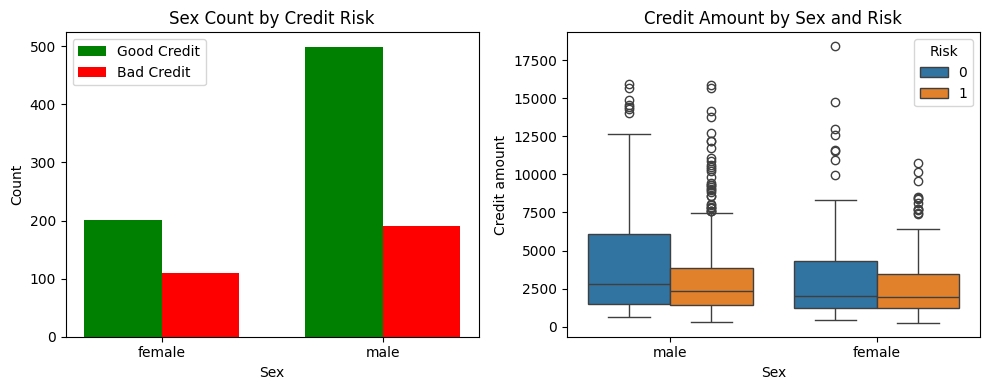

In [46]:
#@title 2.5. SEX DISTRIBUTION AND CREDIT AMOUNT
import matplotlib.pyplot as plt
import seaborn as sns

# Data for bar plots (counts of Sex for good and bad credit risks)
good_sex_counts = df_credit[df_credit["Risk"] == 1]["Sex"].value_counts()
bad_sex_counts = df_credit[df_credit["Risk"] == 0]["Sex"].value_counts()

# Extract unique sex categories for the x-axis
sex_categories = sorted(df_credit["Sex"].unique())

# Align the counts for 1 and 0 risks with the unique sex categories
good_counts = [good_sex_counts.get(cat, 0) for cat in sex_categories]
bad_counts = [bad_sex_counts.get(cat, 0) for cat in sex_categories]

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar plot: Sex distribution (good and bad credit)
x = range(len(sex_categories))
width = 0.35

# Plotting bars for good and bad credit
axes[0].bar([p - width/2 for p in x], good_counts, width, label='Good Credit', color='g')
axes[0].bar([p + width/2 for p in x], bad_counts, width, label='Bad Credit', color='r')

# Setting labels and ticks
axes[0].set_title('Sex Count by Credit Risk')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')
axes[0].set_xticks(x)
axes[0].set_xticklabels(sex_categories)
axes[0].legend()

# Box plot: Credit amount by Sex for good and bad credit
sns.boxplot(ax=axes[1], x="Sex", y="Credit amount", hue="Risk", data=df_credit)

# Setting title for the second plot
axes[1].set_title('Credit Amount by Sex and Risk')

# Adjust layout for aesthetics
plt.tight_layout()

# Display the plot
plt.show()


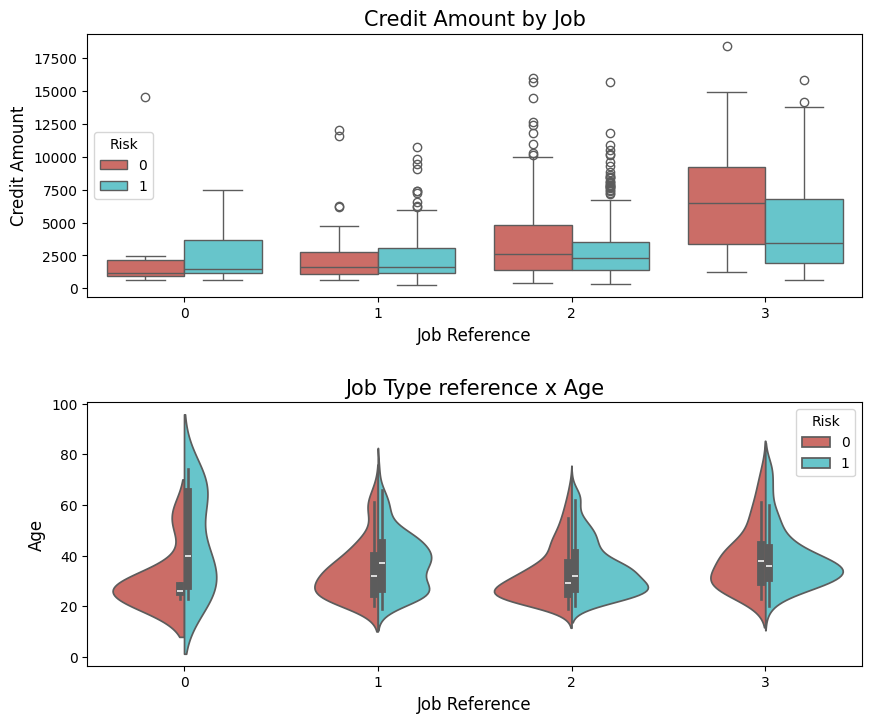

In [45]:
#@title 2.6. CREDIT AMOUNT AND JOB AND AGE

fig, ax = plt.subplots(figsize=(10, 8), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit,
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

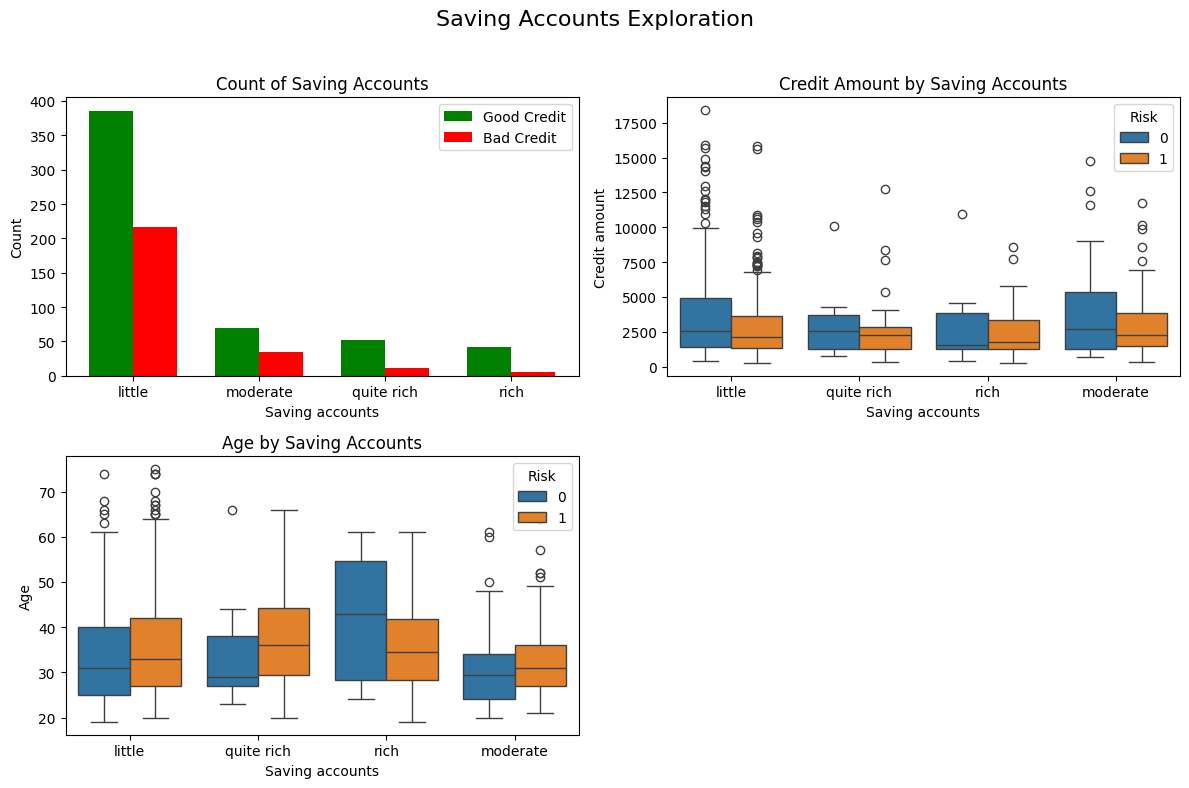

In [49]:
#@title 2.7. SAVINGS DISTRIBUTION OVER TARGET

# Data for plotting
df_good = df_credit[df_credit["Risk"] == 1]
df_bad = df_credit[df_credit["Risk"] == 0]

# Creating the grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Adjust the layout and titles
fig.suptitle('Saving Accounts Exploration', fontsize=16)

# First plot - Bar plot for Saving Accounts count (Good and Bad credit)
good_saving_counts = df_good["Saving accounts"].value_counts()
bad_saving_counts = df_bad["Saving accounts"].value_counts()

saving_categories = sorted(df_credit["Saving accounts"].dropna().unique())

# Align the counts for 1 and 0 risks with the saving categories
good_counts = [good_saving_counts.get(cat, 0) for cat in saving_categories]
bad_counts = [bad_saving_counts.get(cat, 0) for cat in saving_categories]

x = range(len(saving_categories))
width = 0.35

# Bar plots
axes[0, 0].bar([p - width/2 for p in x], good_counts, width, label='Good Credit', color='g')
axes[0, 0].bar([p + width/2 for p in x], bad_counts, width, label='Bad Credit', color='r')
axes[0, 0].set_title('Count of Saving Accounts')
axes[0, 0].set_xlabel('Saving accounts')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(saving_categories)
axes[0, 0].legend()

# Second plot - Box plot for Credit Amount by Saving accounts (Good and Bad credit)
sns.boxplot(ax=axes[0, 1], x="Saving accounts", y="Credit amount", hue="Risk", data=df_credit)
axes[0, 1].set_title('Credit Amount by Saving Accounts')

# Third plot - Box plot for Age by Saving accounts (Good and Bad credit)
sns.boxplot(ax=axes[1, 0], x="Saving accounts", y="Age", hue="Risk", data=df_credit)
axes[1, 0].set_title('Age by Saving Accounts')

# Remove the empty subplot (axes[1, 1])
fig.delaxes(axes[1, 1])

# Adjust layout for a clean look
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


In [51]:
#@title 2.8. SUMMARY OF ALL COLUMNS

interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)

print("Purpose : ",df_credit.Purpose.unique())
print("Sex : ",df_credit.Sex.unique())
print("Housing : ",df_credit.Housing.unique())
print("Saving accounts : ",df_credit['Saving accounts'].unique())
print("Risk : ",df_credit['Risk'].unique())
print("Checking account : ",df_credit['Checking account'].unique())
print("Aget_cat : ",df_credit['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  [1 0]
Checking account :  ['little' 'moderate' nan 'rich']
Aget_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


In [66]:
#@title 3.1. ENCODING AND MISSING VALUES
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config

df_credit_processed = df_credit.drop(columns='Risk')
df_credit_processed['Credit amount'] = np.log(df_credit_processed['Credit amount'])

categorical_cols = [
    'Saving accounts',
    'Checking account',
    'Purpose',
    'Sex',
    'Housing',
    'Age_cat',
]

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='no_inf')),  # Fill NaNs
    ('onehot', OneHotEncoder(drop='first'))  # One-hot encode
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns not listed in categorical_cols
)

df_credit_processed = pd.DataFrame(preprocessor.fit_transform(df_credit_processed))
df_credit_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,67.0,2.0,7.063904,6.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,22.0,2.0,8.691315,48.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0,7.647786,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0,8.972337,42.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,8.490849,24.0


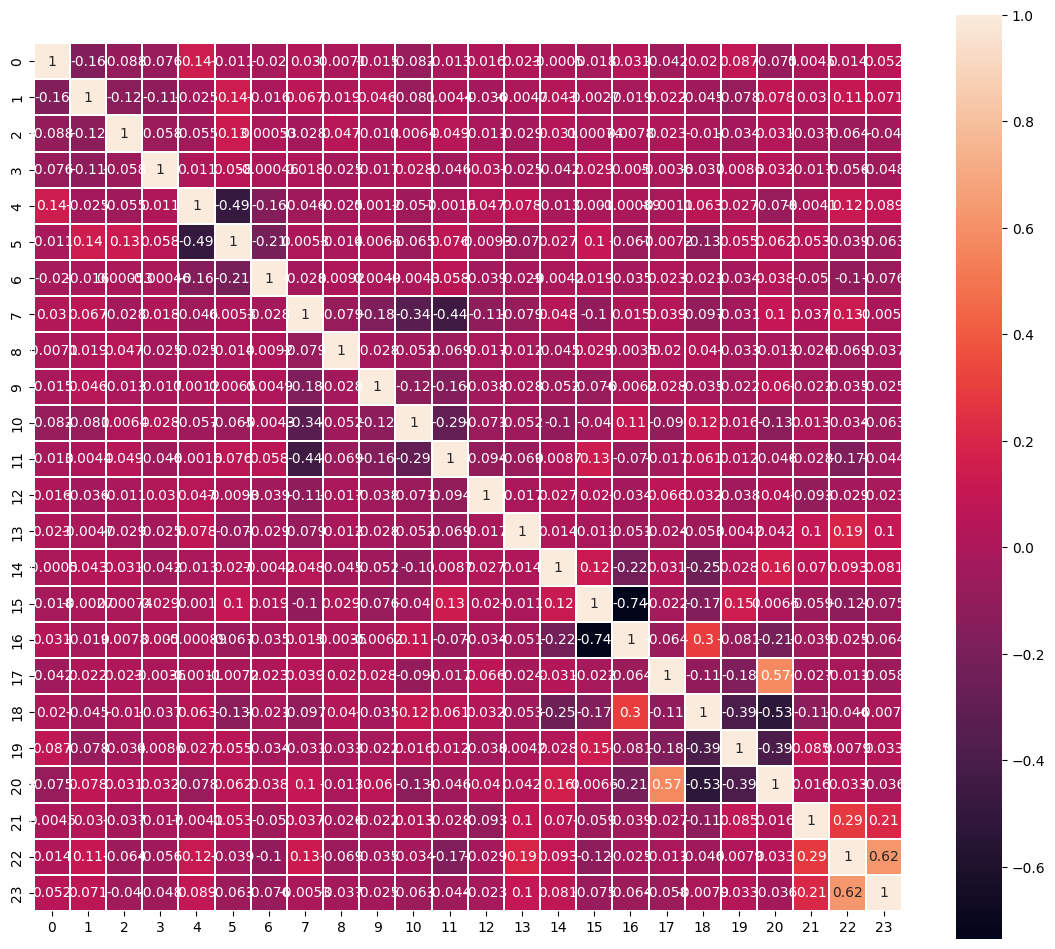

In [65]:
#@title 3.2. CORRELATION MATRIX

plt.figure(figsize=(14,12))
sns.heatmap(df_credit_processed.astype(float).corr(),linewidths=0.1,vmax=1.0,
            square=True,  linecolor='white', annot=True)
plt.show()

In [68]:
#@title 4.1. DEFINE FEATURES AND TARGET
# X = df_credit.drop(columns='Risk')
X = df_credit_processed
y = df_credit['Risk']

X.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,67.0,2.0,7.063904,6.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,22.0,2.0,8.691315,48.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,49.0,1.0,7.647786,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,45.0,2.0,8.972337,42.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,8.490849,24.0


In [84]:
#@title 4.2. MLP PREDICTION TRIAL
n_simulation = 50
test_size = 0.3
total = 0

for idx in tqdm(range(n_simulation)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=idx)

    mlp = GaussianNB()
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    total += (y_pred == y_test).mean()

accuracy = total / n_simulation
accuracy

100%|██████████| 50/50 [00:00<00:00, 125.03it/s]


0.6869333333333332

In [75]:
#@title 5.1. KAN INSTALLATION
!pip install pykan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.3/77.3 kB 2.4 MB/s eta 0:00:00


In [87]:
#@title 5.2 INSTANTIATE KAN MODEL
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[24,3,1], grid=3, k=3, seed=42, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


In [90]:
#@title 5.3. TRANSFORM TO TORCH TENSOR OBJECT

dataset = dict()
dataset['train_input'] = torch.from_numpy(X_train.values)
dataset['train_label'] = torch.from_numpy(y_train.values)

dataset['test_input'] = torch.from_numpy(X_test.values)
dataset['test_label'] = torch.from_numpy(y_test.values)


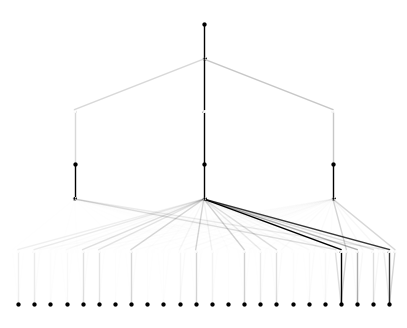

In [91]:
model(dataset['train_input'])
model.plot()

| train_loss: 4.58e-01 | test_loss: 4.58e-01 | reg: 1.71e+00 | : 100%|█| 50/50 [00:34<00:00,  1.47it


saving model version 0.1


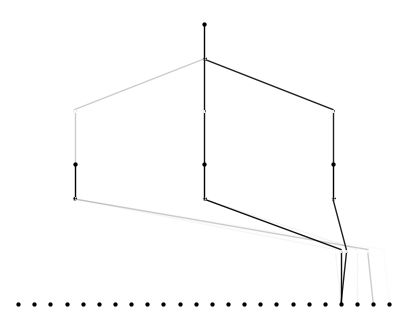

In [92]:
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001)
model.plot()

saving model version 0.2


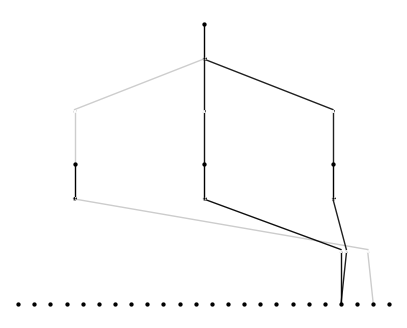

In [93]:
model = model.prune()
model.plot()

In [105]:
#@title 5.4. OBTAIN KAN PREDICTION IN NUMPY

pred = model(dataset['test_input']).detach().cpu().numpy().flatten()
pred[pred >= 0.5] = 1
pred[pred < 0.5] = 0
(pred == y_test).mean()

0.67